In [1]:
import numpy as np
import pandas
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json
import os

In [2]:
emotions = ['happy', 'sad', 'angry', 'chill', 'dreamy', 'lovey-dovey', 'epic', 'anxious', 'pump-up', 'sexy']
path = './dataset.csv'

client_id = '2d0aef4304064e67bdce269495c514ba'
client_secret = 'b0b2829b32cd4963a5de4c35528faf1d'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False

def create_initial_dataset(emotions: list) -> pandas.DataFrame:
    
    search_results = []
    songs = []

    #collect 10 playlist IDs for each emotion
    for e in emotions:

        search_query = e
        result = sp.search(search_query, type='playlist')
        search_results.append(result)

    print('Playlists scraped successfully...')

    #collect audio features from every song the collected playlists are composed of
    for i in range(len(search_results)):
        print(emotions[i], ':')
        for j in search_results[i]['playlists']['items']:
            tracks = sp.playlist_items(j['id'])
            for k in tracks['items']:
                if (k['track'] != None and k['track']['id'] != None and k['track']['id'] != ''):
                    #details
                    uri = 'spotify:track:' + k['track']['id']
                    features = sp.audio_features(uri)
                    if (features[0] != None):
                        songs.append([emotions[i], k['track']['id'], features[0]['danceability'], features[0]['energy'], features[0]['key'], features[0]['loudness'], features[0]['mode'], features[0]['speechiness'], features[0]['acousticness'], features[0]['instrumentalness'], features[0]['valence'], features[0]['tempo']])
        print("Got 'em tracks!")
    
    #create dataframe and store information on a .csv document for quicker retrieval
    array = np.array(songs)
    df = pandas.DataFrame(array, columns=['emotion', 'song', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'tempo'])
    df.to_csv('./dataset.csv')
    print('Done!')

if not os.path.exists(path):
    df = create_initial_dataset(emotions)

else:
    df = pandas.read_csv(path)
    df.drop('Unnamed: 0', axis=1, inplace=True)
    print('Done!')

Done!


In [3]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000,8330.000000
mean,0.588771,0.538897,5.250180,-9.142582,0.632773,0.084023,0.363912,0.183046,0.409984,117.427531
std,0.169335,0.247475,3.612298,4.980055,0.482078,0.087173,0.341976,0.336447,0.237955,29.032848
min,0.000000,0.000289,0.000000,-37.865000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
25%,0.481000,0.349000,2.000000,-11.173750,0.000000,0.036500,0.042200,0.000000,0.214000,94.978500
50%,0.608000,0.547000,5.000000,-7.948500,1.000000,0.048500,0.244000,0.000028,0.382000,118.066500
75%,0.714000,0.741000,8.000000,-5.720000,1.000000,0.087575,0.694000,0.102750,0.582000,135.981750
max,0.980000,0.998000,11.000000,-0.198000,1.000000,0.811000,0.996000,0.996000,0.980000,220.099000


In [4]:
df.drop_duplicates(subset='song', inplace=True)
df.reset_index(drop=True, inplace=True)
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
count,7599.000000,7599.000000,7599.00000,7599.000000,7599.000000,7599.000000,7599.000000,7599.000000,7599.000000,7599.000000
mean,0.585647,0.536511,5.24648,-9.302788,0.632846,0.083579,0.366803,0.197934,0.407559,117.383749
std,0.171685,0.249895,3.60543,5.093756,0.482061,0.087791,0.344271,0.346383,0.238734,29.120341
min,0.000000,0.000289,0.00000,-37.865000,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
25%,0.477000,0.344000,2.00000,-11.394000,0.000000,0.036200,0.040800,0.000000,0.211000,94.869500
50%,0.605000,0.546000,5.00000,-8.065000,1.000000,0.047800,0.247000,0.000050,0.378000,118.068000
75%,0.712000,0.740000,8.00000,-5.791000,1.000000,0.085550,0.699000,0.188500,0.581000,135.981500
max,0.980000,0.998000,11.00000,-0.198000,1.000000,0.811000,0.996000,0.996000,0.980000,220.099000


In [5]:
df.head(len(df))

,emotion,song,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,valence,tempo
0,happy,2U9ln4tEDs22K8NCSAitt1,0.739,0.900,0,-4.866,1,0.0463,0.001820,0.629000,0.474,126.999
1,happy,30oRPNefnSnXEBL2aOifIS,0.674,0.862,5,-6.431,0,0.0344,0.001230,0.064300,0.806,123.004
2,happy,2VveodsDiyIi3zcYMDgRx1,0.846,0.637,9,-7.388,0,0.0370,0.021900,0.000826,0.557,120.997
3,happy,08sfbGBXxJM7MIquO1lmAq,0.660,0.918,6,-4.321,1,0.0486,0.039700,0.000206,0.432,122.065
4,happy,0ynPUHpdm11TcLZrA0cUTO,0.612,0.883,0,-5.799,1,0.0370,0.001620,0.090400,0.393,120.980
...,...,...,...,...,...,...,...,...,...,...,...,...
7594,sexy,2vPTtiR7x7T6Lr17CE2FAE,0.412,0.441,11,-11.523,0,0.2910,0.029600,0.072600,0.174,185.571
7595,sexy,2G7V7zsVDxg1yRsu7Ew9RJ,0.835,0.626,1,-5.833,1,0.1250,0.058900,0.000060,0.350,91.030
7596,sexy,6HlE9t71z9DjGi7KqSyEpA,0.711,0.592,4,-7.136,0,0.2300,0.758000,0.000000,0.535,124.749
7597,sexy,2Sh4sAOfnSHEVKFyysxzat,0.694,0.810,11,-3.556,0,0.0661,0.122000,0.000000,0.824,137.968


In [6]:
def count_songs_for_emotion(df: pandas.DataFrame) -> list:
    
    counter = [0 for i in emotions]

    for j in range(len(df)):
        e = df.iloc[j]['emotion']
        for k in range(len(emotions)):
            if emotions[k] == e:
                counter[k] += 1
    return counter

counter = count_songs_for_emotion(df)

In [7]:
counter

[887, 760, 801, 910, 888, 697, 819, 499, 727, 611]

In [8]:
df2 = df[['emotion', 'song', 'energy', 'valence']]
df2.head(1000)

,emotion,song,energy,valence
0,happy,2U9ln4tEDs22K8NCSAitt1,0.900,0.474
1,happy,30oRPNefnSnXEBL2aOifIS,0.862,0.806
2,happy,2VveodsDiyIi3zcYMDgRx1,0.637,0.557
3,happy,08sfbGBXxJM7MIquO1lmAq,0.918,0.432
4,happy,0ynPUHpdm11TcLZrA0cUTO,0.883,0.393
...,...,...,...,...
995,sad,6N22FZs2ZhPBYi3b9XPajV,0.630,0.313
996,sad,3afkJSKX0EAMsJXTZnDXXJ,0.537,0.250
997,sad,1v1oIWf2Xgh54kIWuKsDf6,0.302,0.123
998,sad,0Z5ok0QLLttAKsujOZYOXf,0.470,0.325


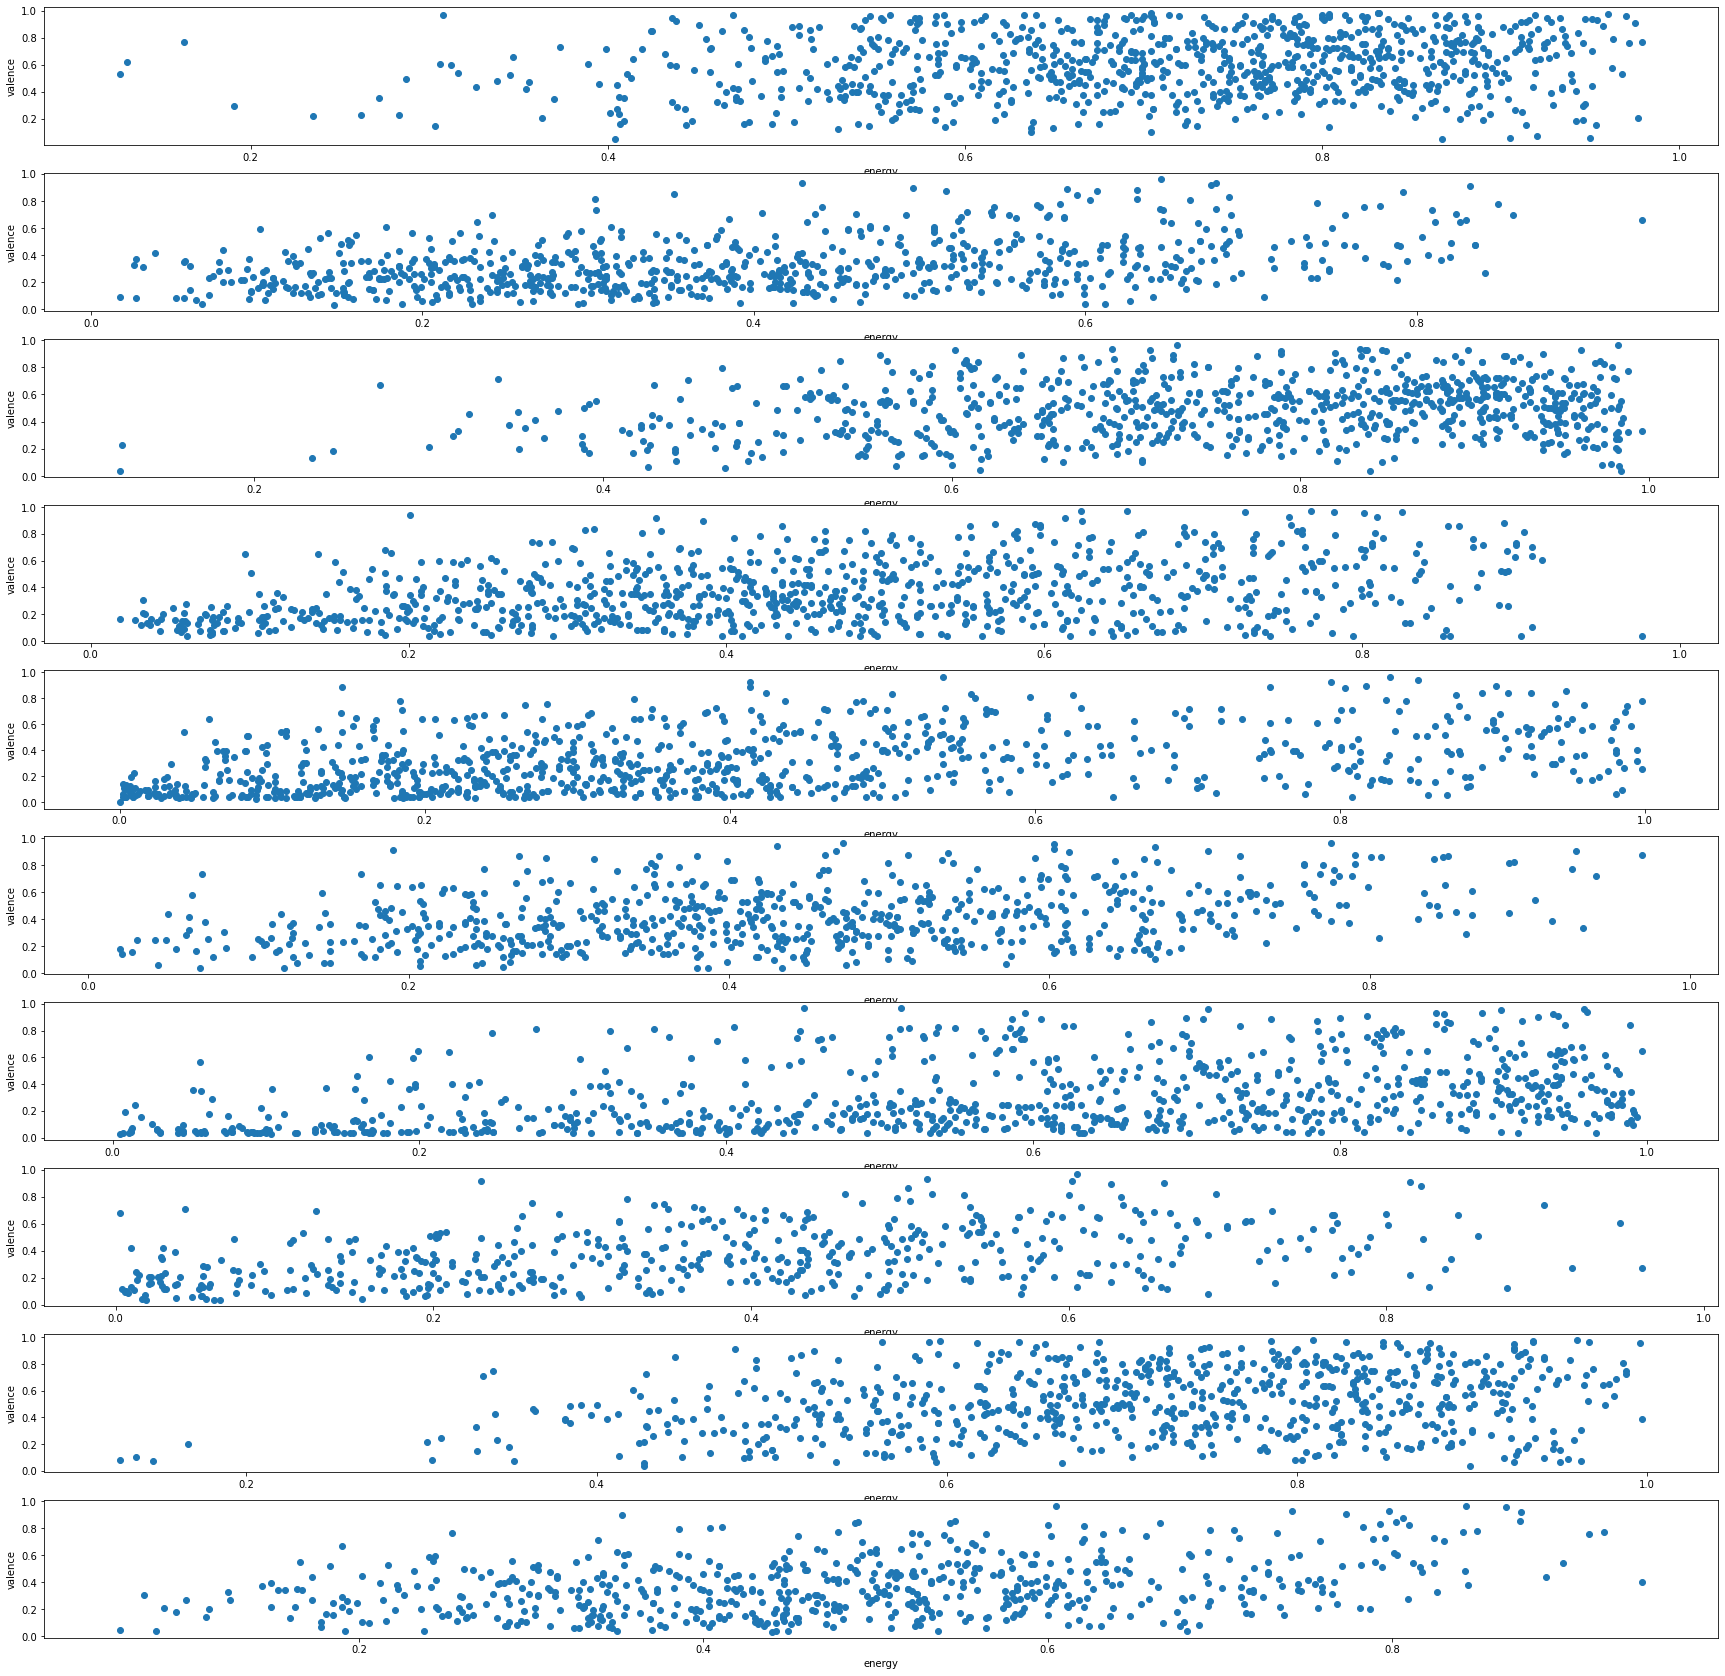

In [9]:
import matplotlib.pyplot as plt
import sklearn.cluster as skc

centroids = []

plt.figure(1, figsize=(30,30))

def draw_scatters(counter: list, df: pandas.DataFrame):
    
    curpos = 0
    cc = 1

    for c in counter:
        df3 = df[curpos:curpos + c]
        df3 = df3[['energy', 'valence']].astype('float')
        
        curpos += c
        
        plt.subplot(10, 1, cc)
        plt.scatter([float(x) for x in df3['energy']], [float (x) for x in df3['valence']])
        plt.xlabel('energy')
        plt.ylabel('valence')
        
        cc += 1
        
draw_scatters(counter, df2)

#m, a = df3['energy'].mean(), df3['valence'].mean()
#s1, s2 = df3['energy'].std(), df3['valence'].std()
#centroids.append((m, a, s1, s2))
##centroid = skc.KMeans(n_clusters=1, init='k-means++', random_state=0).fit(df3[['energy', 'valence']])
##centroids.append(centroid.cluster_centers_)

In [11]:
import math
from scipy import stats

df4 = df2.iloc[:, 2:4]
df4 = df4.astype('float')

z = np.abs(stats.zscore(df4))

threshold = 0.24

df5 = df4[(z < threshold).all(axis=1)]

counter = count_songs_for_emotion(df)
            
print(df5)

      energy  valence
27     0.530    0.358
104    0.537    0.453
164    0.590    0.368
187    0.529    0.438
189    0.557    0.378
...      ...      ...
7476   0.532    0.405
7489   0.507    0.378
7522   0.568    0.453
7528   0.539    0.436
7548   0.478    0.390

[217 rows x 2 columns]


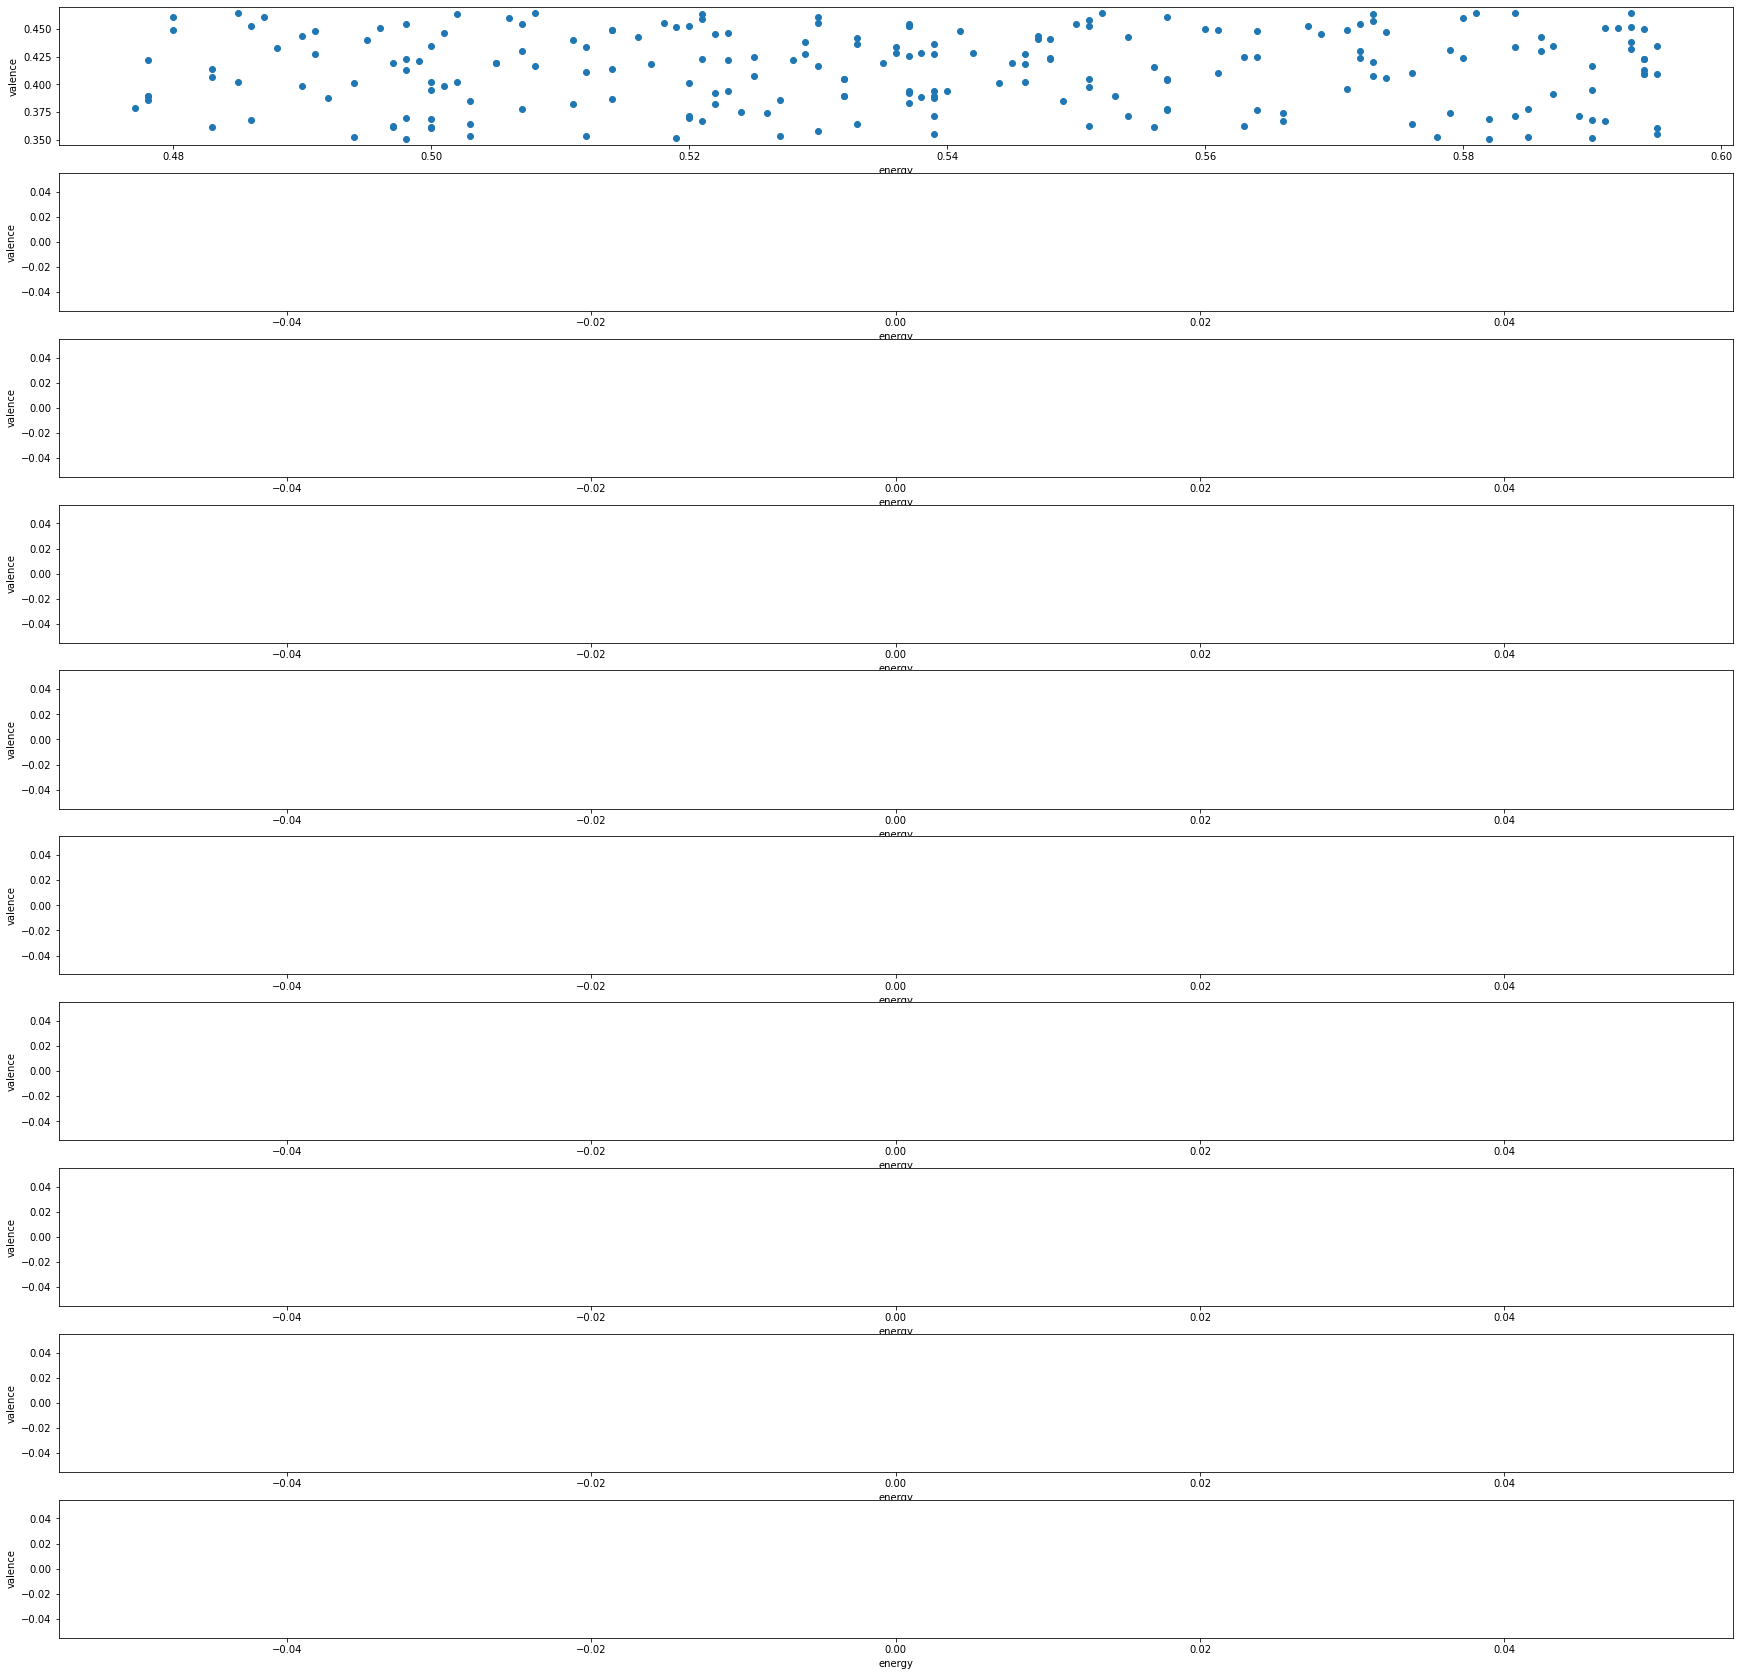

In [12]:
plt.figure(1, figsize=(30,30))

curpos = 0
cc = 1
for c in counter:
    df3 = df5[curpos:curpos + c]
    curpos += c
    plt.subplot(10, 1, cc)
    plt.scatter([float(x) for x in df3['energy']], [float (x) for x in df3['valence']])
    plt.xlabel('energy')
    plt.ylabel('valence')
    cc += 1

In [15]:
curpos = 0
cc = 0
for c in counter:
    x = c
    for i in range(len(df.iloc[curpos:curpos + c + 1])):
        centroid = centroids[cc]
        if ((float(df.iloc[i]['energy']) < centroid[0] - 2 * centroid[2]) or (float(df.iloc[i]['energy']) > centroid[0] + 2 * centroid[2])) and ((float(df.iloc[i]['valence']) < centroid[1] - 2 * centroid[3]) or (float(df.iloc[i]['valence']) > centroid[1] + 2 * centroid[3])):
            k = i + curpos
            df.drop(index=k)
            x -= 1
    counter[cc] = x
    cc += 1
    curpos += c

print(counter)

      energy  valence
0      0.900    0.474
1      0.862    0.806
2      0.637    0.557
3      0.918    0.432
4      0.883    0.393
...      ...      ...
7594   0.441    0.174
7595   0.626    0.350
7596   0.592    0.535
7597   0.810    0.824
7598   0.866    0.960

[7599 rows x 2 columns]
[[1.45466183 0.27832384]
 [1.30258825 1.66908557]
 [0.40215253 0.62601427]
 ...
 [0.22206539 0.53385536]
 [1.09448755 1.74448831]
 [1.31859599 2.31419794]]
      energy  valence
27     0.530    0.358
104    0.537    0.453
164    0.590    0.368
187    0.529    0.438
189    0.557    0.378
...      ...      ...
7476   0.532    0.405
7489   0.507    0.378
7522   0.568    0.453
7528   0.539    0.436
7548   0.478    0.390

[217 rows x 2 columns]
[1412, 622, 798, 800, 859, 640, 819, 464, 727, 579]
